In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high =90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
#Import the datetime module from the datetime library.
from datetime import datetime
#Import the requests library and the weather_api_key
import requests
from config import weather_api_key

In [6]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | atherton
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kemijarvi
Processing Record 10 of Set 1 | pisco
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | altamira
Processing Record 23 of Set 1 | bethel
Processing 

Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | bam
Processing Record 45 of Set 4 | alugan
Processing Record 46 of Set 4 | san benito
Processing Record 47 of Set 4 | coahuayana
Processing Record 48 of Set 4 | mimongo
Processing Record 49 of Set 4 | veinticinco de mayo
Processing Record 50 of Set 4 | yashan
Processing Record 1 of Set 5 | brainerd
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | antalaha
Processing Record 8 of Set 5 | esperance
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | palauig
Processing Record 11 of Set 5 | kuryk
Processing Record 12 of Set 5 | novyy urengoy
Processing Record 13 of Set 5 | bac lieu
Processing Record 14 of Set 5 | saint george
Processing Record 15 of Set 5 | san ignacio
Processing Record 16 of Set 5 | milicz
Processing R

Processing Record 34 of Set 8 | palanpur
Processing Record 35 of Set 8 | la palma
Processing Record 36 of Set 8 | nelson bay
Processing Record 37 of Set 8 | qaqortoq
Processing Record 38 of Set 8 | high level
Processing Record 39 of Set 8 | mosetse
Processing Record 40 of Set 8 | becerril
Processing Record 41 of Set 8 | ratangarh
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | mkushi
Processing Record 44 of Set 8 | zalantun
Processing Record 45 of Set 8 | timiryazevskiy
Processing Record 46 of Set 8 | chenzhou
Processing Record 47 of Set 8 | demyansk
Processing Record 48 of Set 8 | klaksvik
Processing Record 49 of Set 8 | luderitz
Processing Record 50 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 1 of Set 9 | zapolyarnyy
Processing Record 2 of Set 9 | lukulu
Processing Record 3 of Set 9 | juegang
Processing Record 4 of Set 9 | port-cartier
Processing Record 5 of Set 9 | manokwari
Processing Record 6 of Set 9 | gelemso
Processing Record

Processing Record 24 of Set 12 | beyneu
Processing Record 25 of Set 12 | marsa matruh
Processing Record 26 of Set 12 | semporna
Processing Record 27 of Set 12 | manaure
Processing Record 28 of Set 12 | olden
Processing Record 29 of Set 12 | mosquera
Processing Record 30 of Set 12 | ponta delgada
Processing Record 31 of Set 12 | cayeli
Processing Record 32 of Set 12 | tillabery
City not found. Skipping...
Processing Record 33 of Set 12 | notre-dame-du-lac
Processing Record 34 of Set 12 | nguiu
City not found. Skipping...
Processing Record 35 of Set 12 | benque viejo
City not found. Skipping...
Processing Record 36 of Set 12 | manacapuru
Processing Record 37 of Set 12 | collie
Processing Record 38 of Set 12 | san vicente
Processing Record 39 of Set 12 | batagay
Processing Record 40 of Set 12 | anchorage
Processing Record 41 of Set 12 | tukrah
Processing Record 42 of Set 12 | amapa
Processing Record 43 of Set 12 | takanabe
Processing Record 44 of Set 12 | ostrovnoy
Processing Record 45 of

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atherton,53.52,-2.49,60.01,92,52,1.01,GB,2020-08-19 03:45:16
1,Thompson,55.74,-97.86,60.80,87,90,3.36,CA,2020-08-19 03:40:54
2,Mataura,-46.19,168.86,55.17,82,82,1.05,NZ,2020-08-19 03:40:40
3,Cabo San Lucas,22.89,-109.91,86.00,51,90,5.82,MX,2020-08-19 03:40:44
4,Qaanaaq,77.48,-69.36,43.56,77,100,4.65,GL,2020-08-19 03:40:56
5,Kavieng,-2.57,150.80,84.47,72,40,8.81,PG,2020-08-19 03:41:14
6,Dikson,73.51,80.55,55.98,69,0,10.49,RU,2020-08-19 03:40:46
7,Ushuaia,-54.80,-68.30,30.20,86,40,8.05,AR,2020-08-19 03:38:14
8,Kemijarvi,66.71,27.43,49.19,77,80,4.16,FI,2020-08-19 03:45:17
9,Pisco,-13.70,-76.22,60.80,82,40,5.82,PE,2020-08-19 03:40:43


In [9]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atherton,GB,2020-08-19 03:45:16,53.52,-2.49,60.01,92,52,1.01
1,Thompson,CA,2020-08-19 03:40:54,55.74,-97.86,60.80,87,90,3.36
2,Mataura,NZ,2020-08-19 03:40:40,-46.19,168.86,55.17,82,82,1.05
3,Cabo San Lucas,MX,2020-08-19 03:40:44,22.89,-109.91,86.00,51,90,5.82
4,Qaanaaq,GL,2020-08-19 03:40:56,77.48,-69.36,43.56,77,100,4.65
...,...,...,...,...,...,...,...,...,...
571,Alofi,NU,2020-08-19 03:41:58,-19.06,-169.92,75.20,94,90,12.75
572,Otavi,NA,2020-08-19 03:46:39,-19.65,17.33,39.92,63,0,18.95
573,Pathein,MM,2020-08-19 03:43:07,16.78,94.73,78.69,88,100,6.82
574,Mahina,PF,2020-08-19 03:46:40,-17.51,-149.49,82.40,61,75,3.36


In [10]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

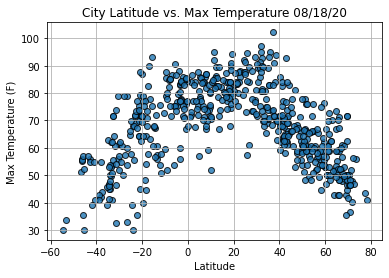

In [13]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

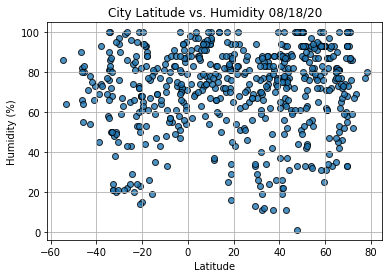

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

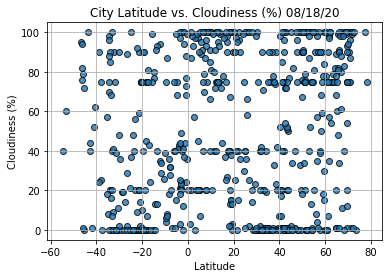

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

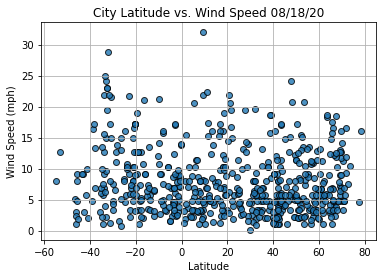

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()